In [401]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seawater as sw

adir='C:/Users/gentemann/Google Drive/f_drive/docs/projects/saildrone/Arctic/'


In [402]:
icefile='C:/Users/gentemann/Google Drive/f_drive/docs/projects/misst-arctic/Ice Present.xlsx'
ds = pd.read_excel(icefile, sheet_name='data',index_col=0)
ds_ice = ds.to_xarray()

In [403]:
ds_ice

<xarray.Dataset>
Dimensions:     (usv: 25)
Coordinates:
  * usv         (usv) int64 1034 1034 1034 1034 1034 ... 1036 1037 1037 1037
Data variables:
    start_time  (usv) datetime64[ns] 2019-06-19T19:00:00 ... 2019-08-04
    stop_time   (usv) datetime64[ns] 2019-06-19T22:00:00 ... 2019-08-08T18:00:00

In [432]:
adir = 'F:/data/cruise_data/saildrone/2019_arctic/daily_files/'
list_usv=[1033,1034,1035,1036,1037]
for iusv in list_usv:
    file = adir + 'arctic_2019_sd'+str(iusv)+'-NRT-1_min-v1.nc'
    ds = xr.open_dataset(file)
    if iusv==1033:
        ds = ds.sel(time=slice('2019-05-14T1800','2019-10-22'))
        ds2=ds
    if iusv==1034:
        ds = ds.sel(time=slice('2019-05-14T1830','2019-10-22'))
        ds['WIND_MEASUREMENT_HEIGHT_MEAN']=ds['TEMP_AIR_MEAN']*np.nan
        ds['WIND_MEASUREMENT_HEIGHT_STDDEV']=ds['TEMP_AIR_MEAN']*np.nan
        ds2=xr.concat([ds2,ds],dim='trajectory')
    if iusv==1035:
        ds = ds.sel(time=slice('2019-05-14T2230','2019-10-22'))
        ds['WIND_HEIGHT_MEAN']=ds['TEMP_AIR_MEAN']*np.nan
        ds['WIND_HEIGHT_STDDEV']=ds['TEMP_AIR_MEAN']*np.nan
        ds2=xr.concat([ds2,ds],dim='trajectory')
    if iusv==1036:
        ds = ds.sel(time=slice('2019-05-14T2300','2019-10-22'))
        ds['LW_IRRAD_MEAN']=ds['TEMP_AIR_MEAN']*np.nan
        ds['LW_IRRAD_STDDEV']=ds['TEMP_AIR_MEAN']*np.nan
        ds['SW_IRRAD_TOTAL_MEAN']=ds['TEMP_AIR_MEAN']*np.nan
        ds['SW_IRRAD_TOTAL_STDDEV']=ds['TEMP_AIR_MEAN']*np.nan
        ds['SW_IRRAD_DIFFUSE_MEAN']=ds['TEMP_AIR_MEAN']*np.nan
        ds['SW_IRRAD_DIFFUSE_STDDEV']=ds['TEMP_AIR_MEAN']*np.nan
        ds['O2_CONC_AANDERAA_MEAN']=ds['TEMP_AIR_MEAN']*np.nan
        ds['O2_CONC_AANDERAA_STDDEV']=ds['TEMP_AIR_MEAN']*np.nan
        ds['O2_SAT_AANDERAA_MEAN']=ds['TEMP_AIR_MEAN']*np.nan
        ds['O2_SAT_AANDERAA_STDDEV']=ds['TEMP_AIR_MEAN']*np.nan
        ds['TEMP_O2_AANDERAA_MEAN']=ds['TEMP_AIR_MEAN']*np.nan
        ds['TEMP_O2_AANDERAA_STDDEV']=ds['TEMP_AIR_MEAN']*np.nan
        ds['O2_TC_PHASE_AANDERAA_MEAN']=ds['TEMP_AIR_MEAN']*np.nan
        ds['O2_TC_PHASE_AANDERAA_STDDEV']=ds['TEMP_AIR_MEAN']*np.nan
        ds['SW_UNMASKED_IRRAD_6DET_MEAN']=ds['TEMP_AIR_MEAN']*np.nan
        ds['SW_UNMASKED_IRRAD_6DET_STDDEV']=ds['TEMP_AIR_MEAN']*np.nan
        ds['SW_UNMASKED_IRRAD_CENTER_MEAN']=ds['TEMP_AIR_MEAN']*np.nan
        ds['SW_UNMASKED_IRRAD_CENTER_STDDEV']=ds['TEMP_AIR_MEAN']*np.nan
        ds['LW_IRRAD_MEAN']=ds['TEMP_AIR_MEAN']*np.nan
        ds['LW_IRRAD_STDDEV']=ds['TEMP_AIR_MEAN']*np.nan
        ds['WIND_MEASUREMENT_HEIGHT_MEAN']=ds['TEMP_AIR_MEAN']*np.nan
        ds['WIND_MEASUREMENT_HEIGHT_STDDEV']=ds['TEMP_AIR_MEAN']*np.nan
        ds2=xr.concat([ds2,ds],dim='trajectory')
    if iusv==1037:
        ds = ds.sel(time=slice('2019-05-14T2250','2019-10-22'))
        ds['LW_IRRAD_MEAN']=ds['TEMP_AIR_MEAN']*np.nan
        ds['LW_IRRAD_STDDEV']=ds['TEMP_AIR_MEAN']*np.nan
        ds['SW_IRRAD_TOTAL_MEAN']=ds['TEMP_AIR_MEAN']*np.nan
        ds['SW_IRRAD_TOTAL_STDDEV']=ds['TEMP_AIR_MEAN']*np.nan
        ds['SW_IRRAD_DIFFUSE_MEAN']=ds['TEMP_AIR_MEAN']*np.nan
        ds['SW_IRRAD_DIFFUSE_STDDEV']=ds['TEMP_AIR_MEAN']*np.nan
        ds['O2_CONC_AANDERAA_MEAN']=ds['TEMP_AIR_MEAN']*np.nan
        ds['O2_CONC_AANDERAA_STDDEV']=ds['TEMP_AIR_MEAN']*np.nan
        ds['O2_SAT_AANDERAA_MEAN']=ds['TEMP_AIR_MEAN']*np.nan
        ds['O2_SAT_AANDERAA_STDDEV']=ds['TEMP_AIR_MEAN']*np.nan
        ds['TEMP_O2_AANDERAA_MEAN']=ds['TEMP_AIR_MEAN']*np.nan
        ds['TEMP_O2_AANDERAA_STDDEV']=ds['TEMP_AIR_MEAN']*np.nan
        ds['O2_TC_PHASE_AANDERAA_MEAN']=ds['TEMP_AIR_MEAN']*np.nan
        ds['O2_TC_PHASE_AANDERAA_STDDEV']=ds['TEMP_AIR_MEAN']*np.nan
        ds['SW_UNMASKED_IRRAD_6DET_MEAN']=ds['TEMP_AIR_MEAN']*np.nan
        ds['SW_UNMASKED_IRRAD_6DET_STDDEV']=ds['TEMP_AIR_MEAN']*np.nan
        ds['SW_UNMASKED_IRRAD_CENTER_MEAN']=ds['TEMP_AIR_MEAN']*np.nan
        ds['SW_UNMASKED_IRRAD_CENTER_STDDEV']=ds['TEMP_AIR_MEAN']*np.nan
        ds['LW_IRRAD_MEAN']=ds['TEMP_AIR_MEAN']*np.nan
        ds['LW_IRRAD_STDDEV']=ds['TEMP_AIR_MEAN']*np.nan
        ds['WIND_MEASUREMENT_HEIGHT_MEAN']=ds['TEMP_AIR_MEAN']*np.nan
        ds['WIND_MEASUREMENT_HEIGHT_STDDEV']=ds['TEMP_AIR_MEAN']*np.nan
        ds2=xr.concat([ds2,ds],dim='trajectory')


In [436]:
print(ds2.lat.min().data,ds2.lat.max().data)
print(ds2.lon.min().data,ds2.lon.max().data)

53.844832 75.4970304
-176.382208 -146.129856


In [ ]:
import cartopy.crs as ccrs                   # import projections
import cartopy.feature as cf                 # import features
fig = plt.figure(figsize=(8,12))
ax = plt.axes(projection = ccrs.NorthPolarStereo(central_longitude=180.0))  # create a set of axes with Mercator projection
for i in range(5):
    im=ax.scatter(ds2.lon[i,:],ds2.lat[i,:],c=ds2.TEMP_SBE37_MEAN[i,:],s=.15,transform=ccrs.PlateCarree(),label=ds2.trajectory[i].data)
ax.coastlines(resolution='10m')                # plot some data on them
ax.set_extent([-180,-160,50,77])
ax.legend()
cax = fig.add_axes([0.45, 0.15, 0.3, 0.02])
cbar = fig.colorbar(im,cax=cax, orientation='horizontal')
cbar.set_label('SST ($^\deg$C)')
#plt.show()
fig.savefig(adir+'figs/map_all_data.png')

1034 0.037572393641435387 0.385109019187364
1035 0.24101818612631756 0.04513951387527055
1036 0.16244197447383993 0.149870222475228
1037 0.11822110650861972 0.23931423765554807


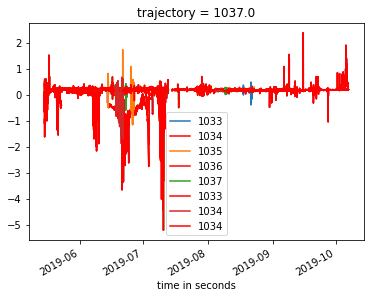

In [400]:
adir = 'F:/data/cruise_data/saildrone/2019_arctic/daily_files/'
list_usv=[1034,1035,1036,1037]
for iusv in list_usv:
    file = adir + 'arctic_2019_sd'+str(iusv)+'-NRT-1_min-v1.nc'
    ds = xr.open_dataset(file)
    #ds['spd']=np.sqrt(ds.UWND_MEAN**2+ds.VWND_MEAN**2)
    if iusv==1033:
        ds = ds.sel(time=slice('2019-05-14T1800','2019-10-22'))
    if iusv==1034:
        ds = ds.sel(time=slice('2019-05-14T1830','2019-10-22'))
    if iusv==1035:
        ds = ds.sel(time=slice('2019-05-14T2230','2019-10-22'))
    if iusv==1036:
        ds = ds.sel(time=slice('2019-05-14T2300','2019-10-22'))
    if iusv==1037:
        ds = ds.sel(time=slice('2019-05-14T2250','2019-10-22'))
    ds = ds.where(ds.SAL_RBR_MEAN>20)
    ds = ds.where(ds.SAL_SBE37_MEAN>20)
    ice = ds_ice.sel(usv=iusv)
    sdif=ds.SAL_SBE37_MEAN-ds.SAL_RBR_MEAN
    sdif2 = sdif.copy(deep=True)
    ind=sdif*0
    for i in range(ice.usv.size):
        cond = (sdif.time>ice.start_time[i]) & (sdif.time<ice.stop_time[i])
        sdif2[cond]=np.nan
    sdif.plot()
    sdif2.plot(color='r')            
    strusv.append(str(iusv))
    print(iusv,sdif.mean().data,sdif.std().data)
plt.legend(strusv)

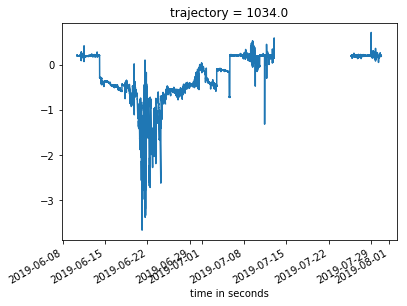

In [292]:
#1034
sdif.sel(time=slice('2019-06-10T0845','2019-07-30T16')).plot()
#1035
#sdif.sel(time=slice('2019-06-14T0845','2019-06-14T16')).plot()
#sdif.sel(time=slice('2019-06-21T07','2019-06-21T13')).plot()
#sdif.sel(time=slice('2019-06-25T0445','2019-06-25T10')).plot()
#sdif.sel(time=slice('2019-06-26T20','2019-06-26T22')).plot()
#sdif.sel(time=slice('2019-08-6T18','2019-08-07T06')).plot()
#sdif.sel(time=slice('2019-08-9T02','2019-08-09T08')).plot()
#sdif.sel(time=slice('2019-08-10T05','2019-08-10T15')).plot()
#sdif.sel(time=slice('2019-08-11T07','2019-08-11T0930')).plot()
#sdif.sel(time=slice('2019-08-20T1030','2019-08-20T14')).plot()
#sdif.sel(time=slice('2019-08-22T2230','2019-08-24T05')).plot()
#1036
#sdif.sel(time=slice('2019-06-17T06','2019-06-17T21')).plot()
#sdif.sel(time=slice('2019-06-22T17','2019-06-22T22')).plot()
#sdif.sel(time=slice('2019-06-23T00','2019-06-23T08')).plot()
#sdif.sel(time=slice('2019-07-18T00','2019-07-18T01')).plot()
#sdif.sel(time=slice('2019-08-06T20','2019-08-07T02')).plot()
#sdif.sel(time=slice('2019-08-08T06','2019-08-10T04')).plot()
#sdif.sel(time=slice('2019-07-07','2019-07-11T12')).plot() #super calm period RBR appears to be bad



In [293]:
ds

<xarray.Dataset>
Dimensions:                          (time: 209237)
Coordinates:
    trajectory                       float32 1034.0
  * time                             (time) datetime64[ns] 2019-05-14 ... 2019-10-06T20:59:00
    lat                              (time) float64 53.84 53.84 ... 56.07 56.07
    lon                              (time) float64 -166.6 -166.6 ... -167.3
Data variables:
    SOG                              (time) float64 nan nan nan ... 0.394 0.229
    SOG_FILTERED_MEAN                (time) float64 nan nan nan ... 0.376 0.395
    SOG_FILTERED_STDDEV              (time) float64 nan nan nan ... 0.186 0.202
    SOG_FILTERED_MAX                 (time) float64 nan nan nan ... 0.849 1.051
    SOG_FILTERED_MIN                 (time) float64 nan nan nan ... 0.06 0.078
    COG                              (time) float64 nan nan nan ... 63.2 271.3
    COG_FILTERED_MEAN                (time) float64 nan nan nan ... 202.7 95.5
    COG_FILTERED_STDDEV              (time

1033 -0.0015606494489778739 0.026926809664680248
1034 0.0009845698470539272 0.03384506713388189
1035 1.551170448617833e-05 0.05090443912868049
1036 -0.00024196648082408257 0.03762014209400266
1037 -0.001557506840571519 0.06954242708544156


Text(0, 0.5, '$\\Delta$ SST (K)')

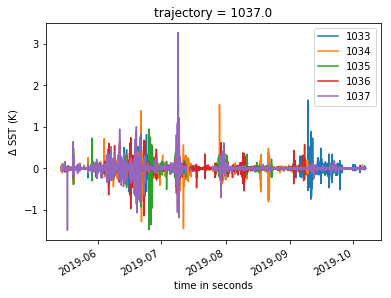

In [40]:
adir = 'F:/data/cruise_data/saildrone/2019_arctic/daily_files/'
strusv=[]
for iusv in range(1033,1038):
    file = adir + 'arctic_2019_sd'+str(iusv)+'-NRT-1_min-v1.nc'
    ds = xr.open_dataset(file)
    ds['spd']=np.sqrt(ds.UWND_MEAN**2+ds.VWND_MEAN**2)
    #ds = ds.where(ds.SA_CTD_RBR_MEAN>20)
    #ds = ds.where(ds.TEMP_SBE37_MEAN>20)
    ds2 = ds.isel(time=slice(250,-1))
    sdif=ds2.TEMP_SBE37_MEAN-ds2.TEMP_CTD_RBR_MEAN
    ax=sdif.plot()
    strusv.append(str(iusv))
    print(iusv,sdif.mean().data,sdif.std().data)
plt.legend(strusv)
plt.ylabel('$\Delta$ SST (K)')

In [377]:
iusv=1033
file = adir + 'arctic_2019_sd'+str(iusv)+'-NRT-1_min-v1.nc'
ds = xr.open_dataset(file)
ds['spd']=np.sqrt(ds.UWND_MEAN**2+ds.VWND_MEAN**2)
#ds = ds.where(ds.SA_CTD_RBR_MEAN>20)
#ds = ds.where(ds.TEMP_SBE37_MEAN>20)
ds2 = ds.isel(time=slice(250,-1))
sdif=ds2.TEMP_SBE37_MEAN-ds2.TEMP_CTD_RBR_MEAN


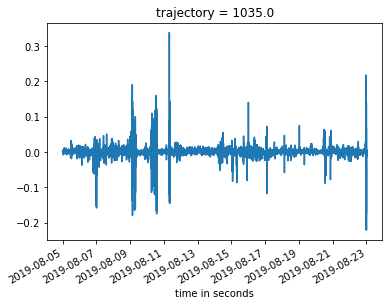

In [47]:
ds2 = ds.sel(time=slice('2019-08-05','2019-08-30'))
sdif=ds2.TEMP_SBE37_MEAN-ds2.TEMP_CTD_RBR_MEAN
sdif.plot()

In [6]:
#Δρ=α*ΔT+βΔS
#α=0.2 #kg m-3 c-1
#β=1 #km m-3 psu-1
s, t, p = 40, 10, 4000
sw.alpha(s,t,p,pt=True)  #salinity psu, temperature deg C, pressure db, pt true if potential
sw.beta(s,t,p,pt=True)  #salinity psu, temperature deg C, pressure db, pt true if potential
sw.aonb(s,t,p,pt=True)
sw.dens0(s,t)

1030.861978077182

In [378]:
iusv=1033
file = adir + 'arctic_2019_sd'+str(iusv)+'-NRT-1_min-v1.nc'
ds = xr.open_dataset(file)
ds.close()
tem=sw.dens0(ds.SAL_SBE37_MEAN,ds.TEMP_SBE37_MEAN)
ds['density']=xr.DataArray(tem,dims='time',coords={'time':ds.time})
tem=sw.alpha(ds.SAL_SBE37_MEAN,ds.TEMP_SBE37_MEAN,ds.BARO_PRES_MEAN*0) #pressure =0 at surface
ds['alpha']=xr.DataArray(tem,dims='time',coords={'time':ds.time})
tem=sw.beta(ds.SAL_SBE37_MEAN,ds.TEMP_SBE37_MEAN,ds.BARO_PRES_MEAN*0) #pressure =0 at surface
ds['beta']=xr.DataArray(tem,dims='time',coords={'time':ds.time})
from geopy.distance import vincenty
temdata=[]
for i in range(ds.lat.size-1):
    if np.all(np.isfinite([ds.lat[i:i+2].data,ds.lon[i:i+2].data])):
        coords_1 = (ds.lat[i], ds.lon[i])  #cpr sample location
        coords_2 = (ds.lat[i+1], ds.lon[i+1])  #eddy location
        tem = geopy.distance.distance(coords_1, coords_2).km
        temdata.append(tem)
    else:
        temdata.append(np.nan)
temdata.append(tem)
ds['dist_km']=xr.DataArray(temdata,dims='time',coords={'time':ds.time})


(array([ 676., 1115., 1048., 1117., 1413., 1989., 1904., 2480., 2675.,
        2658., 3019., 2821., 2999., 3004., 3053., 3184., 2973., 2935.,
        2763., 2563., 2681., 2474., 2646., 2359., 2451., 2487., 2258.,
        2498., 2299., 2247., 2364., 2070., 2133., 1978., 2114., 2151.,
        1964., 2167., 1978., 2178., 2055., 1928., 2013., 1876., 2017.,
        1873., 1757., 1962., 1705., 1863., 1884., 1751., 2090., 1797.,
        1905., 1915., 1787., 2017., 1777., 1796., 1907., 1675., 1796.,
        1618., 1665., 1684., 1632., 1645., 1587., 1526., 1548., 1424.,
        1569., 1484., 1423., 1448., 1401., 1533., 1338., 1304., 1325.,
        1257., 1340., 1158., 1212., 1181., 1082., 1144., 1021.,  938.,
         956.,  864.,  932.,  781.,  771.,  758.,  702.,  649.,  613.,
         615.,  598.,  571.,  557.,  468.,  533.,  458.,  490.,  497.,
         465.,  435.,  450.,  395.,  411.,  403.,  337.,  355.,  302.,
         325.,  281.,  260.,  243.,  226.,  182.,  180.,  174.,  149.,
      

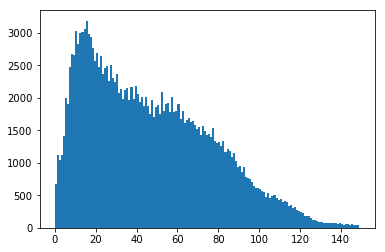

In [324]:
plt.hist(ds.dist_km*1000,np.arange(0,150,1))

In [379]:
iusv=1033
file = adir + 'arctic_2019_sd'+str(iusv)+'-NRT-1_min-v1.nc'
ds = xr.open_dataset(file)
ds.close()
ds

<xarray.Dataset>
Dimensions:                          (time: 209597)
Coordinates:
  * time                             (time) datetime64[ns] 2019-05-14 ... 2019-10-06T23:59:00
    trajectory                       float32 ...
    lat                              (time) float64 ...
    lon                              (time) float64 ...
Data variables:
    SOG                              (time) float64 ...
    SOG_FILTERED_MEAN                (time) float64 ...
    SOG_FILTERED_STDDEV              (time) float64 ...
    SOG_FILTERED_MAX                 (time) float64 ...
    SOG_FILTERED_MIN                 (time) float64 ...
    COG                              (time) float64 ...
    COG_FILTERED_MEAN                (time) float64 ...
    COG_FILTERED_STDDEV              (time) float64 ...
    HDG                              (time) float64 ...
    HDG_FILTERED_MEAN                (time) float64 ...
    HDG_FILTERED_STDDEV              (time) float64 ...
    ROLL_FILTERED_MEAN         

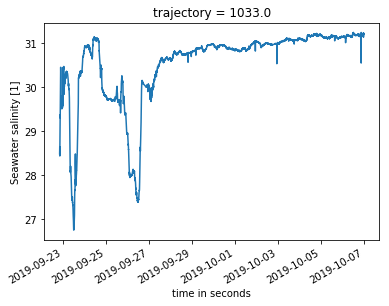

In [380]:
ds.SAL_RBR_MEAN[-20000:].plot()

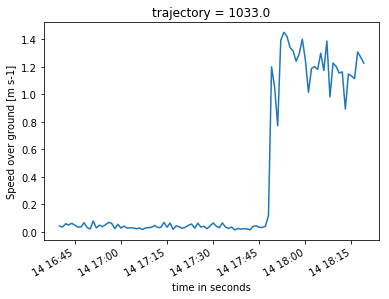

In [390]:
ds.SOG[1000:1100].plot()
#print(ds.time[1350].data)

In [110]:
import geopy
arclen_temp

0.0022065620252362736

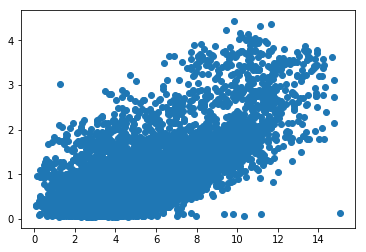

In [122]:
plt.scatter(ds.spd,ds.WAVE_SIGNIFICANT_HEIGHT)

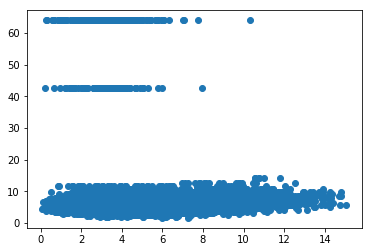

In [123]:
plt.scatter(ds.spd,ds.WAVE_DOMINANT_PERIOD)

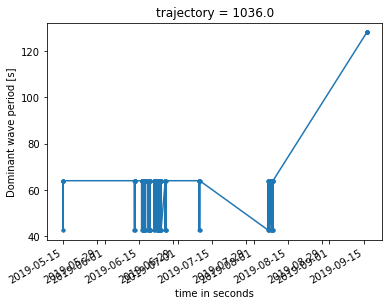

In [124]:
subset=ds.where(ds.WAVE_DOMINANT_PERIOD>20,drop=True)
subset.WAVE_DOMINANT_PERIOD.plot(marker='.')

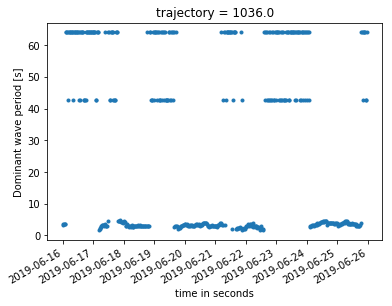

In [28]:
print(subset.time.data)

['2019-05-14T19:00:00.000000000' '2019-05-14T19:30:00.000000000'
 '2019-05-14T20:00:00.000000000' '2019-05-14T20:30:00.000000000'
 '2019-05-14T21:00:00.000000000' '2019-05-14T21:30:00.000000000'
 '2019-05-14T22:00:00.000000000' '2019-05-14T22:30:00.000000000'
 '2019-05-14T23:00:00.000000000' '2019-06-13T04:30:00.000000000'
 '2019-06-13T05:00:00.000000000' '2019-06-13T05:30:00.000000000'
 '2019-06-13T06:00:00.000000000' '2019-06-13T06:30:00.000000000'
 '2019-06-13T07:00:00.000000000' '2019-06-13T07:30:00.000000000'
 '2019-06-13T08:00:00.000000000' '2019-06-13T08:30:00.000000000'
 '2019-06-13T09:00:00.000000000' '2019-06-13T09:30:00.000000000'
 '2019-06-13T10:00:00.000000000' '2019-06-13T10:30:00.000000000'
 '2019-06-16T02:30:00.000000000' '2019-06-16T03:00:00.000000000'
 '2019-06-16T03:30:00.000000000' '2019-06-16T04:00:00.000000000'
 '2019-06-16T04:30:00.000000000' '2019-06-16T05:00:00.000000000'
 '2019-06-16T05:30:00.000000000' '2019-06-16T06:00:00.000000000'
 '2019-06-16T06:30:00.000

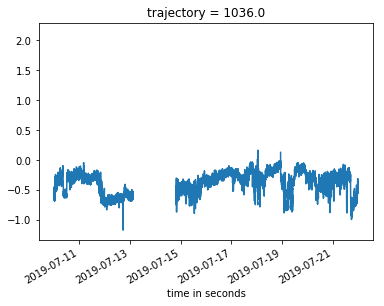

In [44]:
(ds.TEMP_IR_SEA_WING_UNCOMP_MEAN-ds.TEMP_SBE37_MEAN).sel(time=slice('2019-07-10','2019-07-21')).plot()

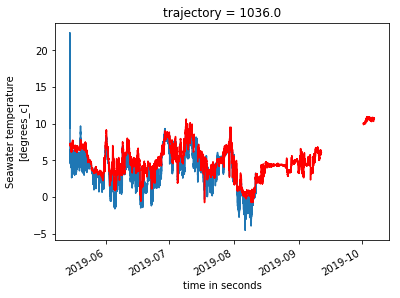

In [48]:
(.96*ds.TEMP_IR_SEA_HULL_UNCOMP_MEAN+0.04*ds.TEMP_IR_SKY_HULL_MEAN).plot()
ds.TEMP_SBE37_MEAN.plot(color='r')

In [85]:
ds=ds.isel(time=slice(200,-1))

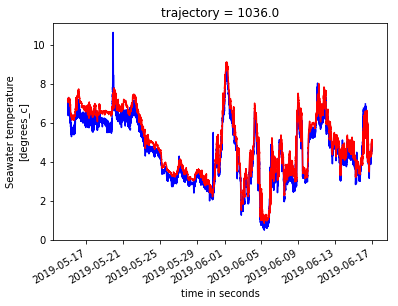

In [112]:
#ds.TEMP_IR_SEA_HULL_UNCOMP_MEAN.plot(color='k')
ds2 = ds.sel(time=slice('2019-05-15','2019-06-16'))
skin=.99*ds2.TEMP_IR_SEA_WING_UNCOMP_MEAN-.01*ds2.TEMP_IR_SKY_HULL_MEAN
#(.98*ds2.TEMP_IR_SEA_WING_UNCOMP_MEAN-.02*ds2.TEMP_IR_SKY_HULL_MEAN).plot(color='b')
skin.plot(color='b')
ds2.TEMP_SBE37_MEAN.plot(color='r')
#0.04*(ds2.TEMP_IR_SKY_HULL_MEAN).plot()

In [114]:
skin=.99*ds2.TEMP_IR_SEA_WING_UNCOMP_MEAN-.01*ds2.TEMP_IR_SKY_HULL_MEAN
print((skin-ds2.TEMP_SBE37_MEAN).std().data)
skin=ds2.TEMP_IR_SEA_WING_UNCOMP_MEAN
print((skin-ds2.TEMP_SBE37_MEAN).std().data)

0.2670825129210383
0.2950309002115863


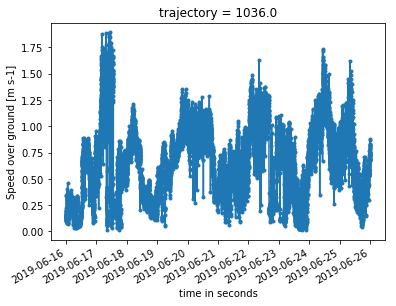

In [71]:
subset=ds.sel(time=slice('2019-06-16','2019-06-25'))
subset.SOG.plot(marker='.')

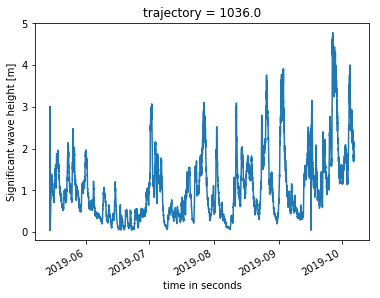

In [67]:
subset = ds.where(np.isfinite(ds.WAVE_SIGNIFICANT_HEIGHT),drop=True)
subset.WAVE_SIGNIFICANT_HEIGHT.plot()

[<xarray.DataArray 'TEMP_IR_SEA_HULL_UNCOMP_MEAN' (time: 208012)>
 array([nan, nan, nan, ..., nan, nan, nan])
 Coordinates:
     trajectory  float32 ...
   * time        (time) datetime64[ns] 2019-05-14T18:12:00 ... 2019-10-06T20:59:00
     lat         (time) float64 ...
     lon         (time) float64 ...
 Attributes:
     standard_name:              sea_surface_skin_temperature
     long_name:                  Hull Sea IR Temperature
     units:                      degrees_c
     update_period:              1000
     nominal_sampling_schedule:  30s on, 270s off, centered at :00
     installed_height:           0.6
     vendor_name:                Heitronics
     model_name:                 CT15.10,
 <xarray.DataArray 'TEMP_IR_SKY_HULL_MEAN' (time: 208012)>
 array([nan, nan, nan, ..., nan, nan, nan])
 Coordinates:
     trajectory  float32 ...
   * time        (time) datetime64[ns] 2019-05-14T18:12:00 ... 2019-10-06T20:59:00
     lat         (time) float64 ...
     lon         (time) 

In [77]:
import numpy as np
from sklearn.linear_model import LinearRegression
#cond = np.isfinite(ds.TEMP_IR_SEA_HULL_UNCOMP_MEAN) # & np.isfinite(ds.TEMP_IR_SKY_HULL_MEAN) & np.isfinite(ds.TEMP_SBE37_MEAN)
#ds2=ds[cond]
ds2 = ds.where(np.isfinite(ds.TEMP_IR_SEA_HULL_UNCOMP_MEAN))
ds2 = ds2.where(np.isfinite(ds.TEMP_IR_SKY_HULL_MEAN))
ds2 = ds2.where(np.isfinite(ds.TEMP_SBE37_MEAN))


In [78]:
X = [ds2.TEMP_IR_SEA_HULL_UNCOMP_MEAN, ds2.TEMP_IR_SKY_HULL_MEAN]
# y = 1 * x_0 + 2 * x_1 + 3
y = ds2.TEMP_SBE37_MEAN
reg = LinearRegression().fit(X, y)
print(reg.score(X, y))
print(reg.coef_)
print(reg.intercept_) 

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
#diabetes = datasets.load_diabetes()


# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [395]:
file = 'F:/data/clim_data/icoads/ICOADS_R3.0.1_2019-06.nc'
ds=xr.open_dataset(file)
ds

<xarray.Dataset>
Dimensions:  (obs: 3479522)
Coordinates:
    time     (obs) object ...
    lat      (obs) float32 ...
    lon      (obs) float32 ...
Dimensions without coordinates: obs
Data variables:
    date     (obs) |S8 ...
    crs      int32 ...
    HR       (obs) float32 ...
    TI       (obs) float32 ...
    LI       (obs) float32 ...
    DS       (obs) float32 ...
    VS       (obs) float32 ...
    NID      (obs) float32 ...
    II       (obs) float32 ...
    ID       (obs) |S9 ...
    DI       (obs) float32 ...
    D        (obs) float32 ...
    WI       (obs) float32 ...
    W        (obs) float32 ...
    VV       (obs) float32 ...
    WW       (obs) float32 ...
    W1       (obs) float32 ...
    SLP      (obs) float32 ...
    A        (obs) float32 ...
    PPP      (obs) float32 ...
    IT       (obs) float32 ...
    AT       (obs) float32 ...
    WBTI     (obs) float32 ...
    WBT      (obs) float32 ...
    DPTI     (obs) float32 ...
    DPT      (obs) float32 ...
    SI  

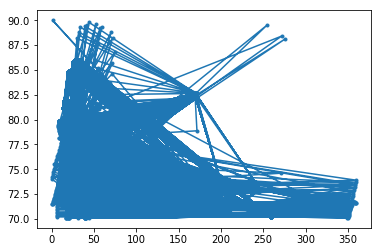

In [398]:
subset = ds.where(ds.lat>70,drop=True)
plt.plot(subset.lon,subset.lat,marker='.')